## Claim Data Vizualization & Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv('../data/raw/claims_data.csv')

## Remove extra spaces

In [3]:
df.columns = df.columns.str.strip()  
str_cols = df.select_dtypes(include='object').columns
df[str_cols] = df[str_cols].apply(lambda col: col.str.strip())

## Standardize Status

In [4]:
df['Status'] = df['Status'].str.capitalize()

## Convert Timestamp

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce', dayfirst=False)

## Remove rows with missing essential values

In [6]:
df = df.dropna(subset=['Claim_ID', 'Food_ID', 'Receiver_ID', 'Status', 'Timestamp'])

## Ensure integer IDs

In [7]:
df[['Claim_ID', 'Food_ID', 'Receiver_ID']] = df[['Claim_ID', 'Food_ID', 'Receiver_ID']].astype(int)

## Remove duplicates

In [8]:
df = df.drop_duplicates(subset=['Claim_ID'])

# Feature Engineering

In [9]:
df['Weekday'] = df['Timestamp'].dt.day_name()
df['Hour'] = df['Timestamp'].dt.hour
df['Month'] = df['Timestamp'].dt.month_name()

## Days since claim (relative to today)

In [10]:
today = pd.Timestamp.today().normalize()
df['Days_Since_Claim'] = (today - df['Timestamp']).dt.days

## Encode status numerically (useful for analysis)

In [11]:
df['Status_Code'] = df['Status'].astype('category').cat.codes

# EDA Summaries

In [12]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Claim_ID          1000 non-null   int64         
 1   Food_ID           1000 non-null   int64         
 2   Receiver_ID       1000 non-null   int64         
 3   Status            1000 non-null   object        
 4   Timestamp         1000 non-null   datetime64[ns]
 5   Weekday           1000 non-null   object        
 6   Hour              1000 non-null   int32         
 7   Month             1000 non-null   object        
 8   Days_Since_Claim  1000 non-null   int64         
 9   Status_Code       1000 non-null   int8          
dtypes: datetime64[ns](1), int32(1), int64(4), int8(1), object(3)
memory usage: 67.5+ KB
None


In [13]:
print("\n--- Status Counts ---")
print(df['Status'].value_counts())


--- Status Counts ---
Status
Completed    339
Cancelled    336
Pending      325
Name: count, dtype: int64


In [14]:
print("\n--- Weekday Claims ---")
print(df['Weekday'].value_counts())


--- Weekday Claims ---
Weekday
Monday       160
Wednesday    149
Saturday     147
Tuesday      145
Thursday     144
Sunday       132
Friday       123
Name: count, dtype: int64


In [15]:
print("\n--- Month Claims ---")
print(df['Month'].value_counts())


--- Month Claims ---
Month
March    1000
Name: count, dtype: int64


# Visualizations

##  Status distribution

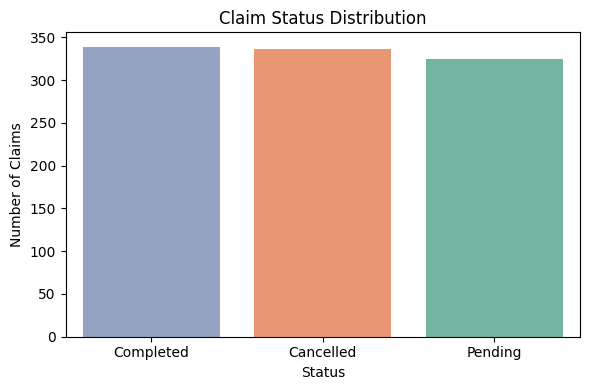

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status', order=df['Status'].value_counts().index, hue = 'Status', legend = False, palette='Set2')
plt.title("Claim Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Claims")
plt.tight_layout()
plt.show()
plt.savefig('../reports/Visualizations/Claim_Data/Claim Status Distribution.png')

## Claims over time

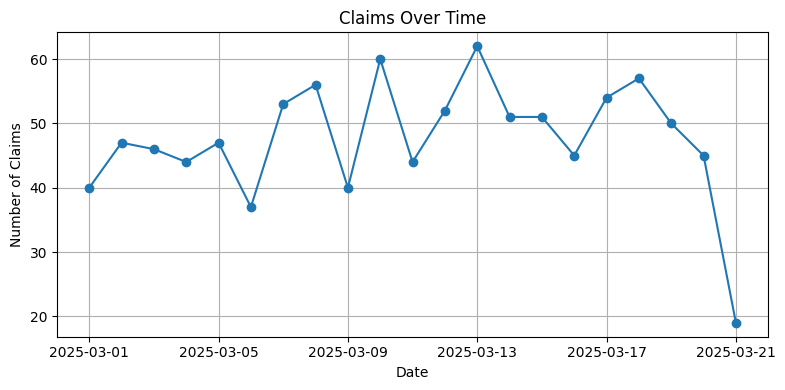

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(8,4))
df.groupby(df['Timestamp'].dt.date).size().plot(kind='line', marker='o')
plt.title("Claims Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Claims")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('../reports/Visualizations/Claim_Data/Claims Over Time.png')

## Claims by weekday

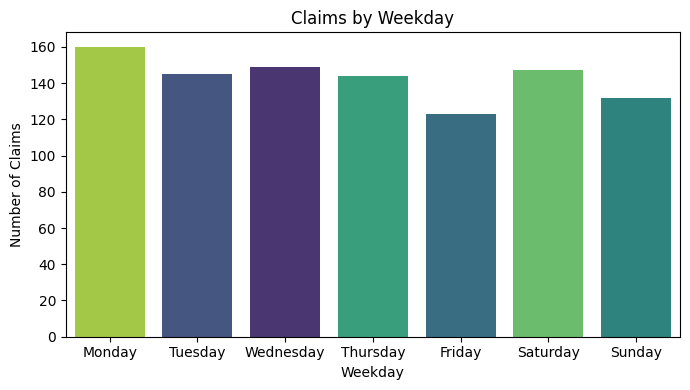

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(7,4))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='Weekday', order=weekday_order, hue = 'Weekday', legend = False, palette='viridis')
plt.title("Claims by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Claims")
plt.tight_layout()
plt.show()
plt.savefig('../reports/Visualizations/Claim_Data/Claims by Weekday.png')

## Claims by hour of day

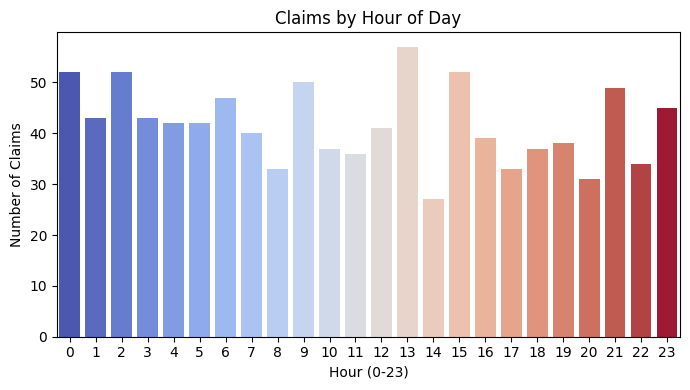

<Figure size 640x480 with 0 Axes>

In [24]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Hour',hue = 'Hour', legend = False , palette='coolwarm')
plt.title("Claims by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Number of Claims")
plt.tight_layout()
plt.show()
plt.savefig('../reports/Visualizations/Claim_Data/Claims by Hour of Day.png')

## Days since claim distribution

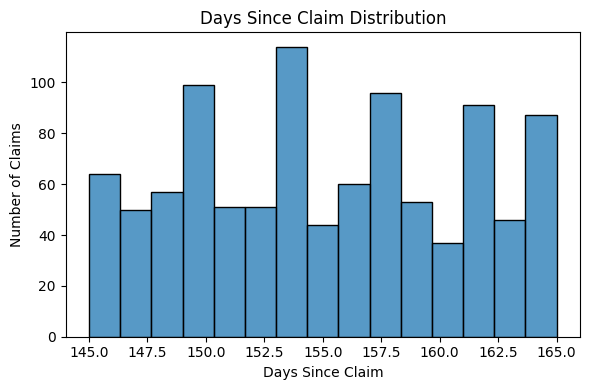

<Figure size 640x480 with 0 Axes>

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df['Days_Since_Claim'], bins=15, kde=False)
plt.title("Days Since Claim Distribution")
plt.xlabel("Days Since Claim")
plt.ylabel("Number of Claims")
plt.tight_layout()
plt.show()
plt.savefig('../reports/Visualizations/Claim_Data/Days Since Claim Distribution.png')

# Save cleaned dataset

In [26]:
df.to_csv("../data/processed/claims_data_clean.csv", index=False)
print("\nCleaned claims dataset saved as 'claims_data_clean.csv'")


Cleaned claims dataset saved as 'claims_data_clean.csv'
